In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [2]:

from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters from docker-compose.yml
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'postgres'

# Create a connection to the PostgreSQL database using psycopg2


try:
    engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    connection = engine.connect()
    print("Connection to PostgreSQL DB successful")
except Exception as e:
    print(f"Error: {e}")
finally:
    if connection:
        connection.close()

Connection to PostgreSQL DB successful


In [3]:
from sqlalchemy import create_engine, Column, Integer, String, Date, Boolean
from sqlalchemy.orm import declarative_base
from sqlalchemy.exc import SQLAlchemyError

# Database connection parameters
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'postgres'

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
# # Initialize the declarative base (for SQLAlchemy ORM models)
# Base = declarative_base()

# # Define Stock Dimension Table
# class StockDimension(Base):
#     __tablename__ = 'stock_dimension'
    
#     stock_id = Column(Integer, primary_key=True)
#     stock_symbol = Column(String(10), nullable=False)
#     company_name = Column(String(255), nullable=False)
#     sector = Column(String(100))
#     currency = Column(String(10))
#     exchange = Column(String(50))

# # Define Date Dimension Table
# class DateDimension(Base):
#     __tablename__ = 'date_dimension'
    
#     date_id = Column(Integer, primary_key=True)
#     full_date = Column(Date, nullable=False)
#     day_of_week = Column(String(20))
#     month = Column(String(20))
#     quarter = Column(String(5))
#     year = Column(Integer)
#     is_holiday = Column(Boolean)

# # Define Sector Dimension Table
# class SectorDimension(Base):
#     __tablename__ = 'sector_dimension'
    
#     sector_id = Column(Integer, primary_key=True)
#     sector_name = Column(String(100), nullable=False)

# # Define Exchange Dimension Table
# class ExchangeDimension(Base):
#     __tablename__ = 'exchange_dimension'
    
#     exchange_id = Column(Integer, primary_key=True)
#     exchange_name = Column(String(100), nullable=False)
#     country = Column(String(100))

# # Function to create schema and tables
# def create_schema_and_tables():
#     try:
#         # Create a connection to the PostgreSQL database
#         engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
        
#         # Use a context manager to handle connection and transaction
#         with engine.connect() as connection:
#             print("Connection to PostgreSQL DB successful")
            
#             # Start a transaction
#             with connection.begin():
#                 # Create schema if it doesn't exist
#                 connection.execute("CREATE SCHEMA IF NOT EXISTS finance_schema;")
#                 print("Schema 'finance_schema' created successfully!")
                
#                 # Create tables in the specified schema directly
#                 Base.metadata.create_all(engine, checkfirst=True)  # checkfirst ensures tables are created only if they don't exist

#                 # Set schema for all tables
#                 for table in Base.metadata.sorted_tables:
#                     connection.execute(f'ALTER TABLE {table.name} SET SCHEMA finance_schema;')

#                 print("All dimension tables created successfully in 'finance_schema'!")

#     except SQLAlchemyError as e:
#         print(f"Error: {e}")

#     finally:
#         print("PostgreSQL connection closed")

# # Execute the function to create schema and tables
# create_schema_and_tables()


In [5]:
from sqlalchemy import create_engine, text
from sqlalchemy.exc import SQLAlchemyError
import pandas as pd

# Database connection parameters
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'postgres'

# Create the database engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to retrieve all schemas
query_schemas = "SELECT schema_name FROM information_schema.schemata;"

# Execute the query and load the results into a DataFrame for schemas
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_schemas))
        schemas = pd.DataFrame(result.fetchall(), columns=['schema_name'])
        print("Schemas:") 
        print(schemas)
except SQLAlchemyError as e:
    print("Error while fetching schemas:", e)

# Specify the schema name to list tables
schema_name = 'finance_schema'  # Change this to your actual schema name

# Query to retrieve all tables in the specified schema
query_tables = f"""
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = '{schema_name}';
"""

# Execute the query and load the results into a DataFrame for tables
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_tables))
        tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
        print(f"\nTables in schema '{schema_name}':")
        print(tables)
except SQLAlchemyError as e:
    print("Error while fetching tables:", e)


Schemas:
           schema_name
0               public
1       finance_schema
2     pg_toast_temp_10
3           pg_temp_10
4      pg_toast_temp_5
5            pg_temp_5
6     pg_toast_temp_13
7           pg_temp_13
8   information_schema
9           pg_catalog
10            pg_toast

Tables in schema 'finance_schema':
                 table_name
0      portfolio_allocation
1         portfolio_history
2          sector_dimension
3        exchange_dimension
4           stock_dimension
5           fact_stock_data
6            date_dimension
7  moving_average_crossover
8       backtesting_results


In [5]:
# def fetch_schemas(engine):
#     query = "SELECT schema_name FROM information_schema.schemata;"
#     try:
#         with engine.connect() as connection:
#             result = connection.execute(text(query))
#             schemas = pd.DataFrame(result.fetchall(), columns=['finance_schema'])
#             return schemas
#     except SQLAlchemyError as e:
#         print("Error while fetching schemas:", e)
#         return None

# # Function to fetch tables in a specified schema
# def fetch_tables(engine, schema_name):
#     query = f"""
#     SELECT table_name 
#     FROM information_schema.tables 
#     WHERE table_schema = '{schema_name}';
#     """
#     try:
#         with engine.connect() as connection:
#             result = connection.execute(text(query))
#             tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
#             return tables
#     except SQLAlchemyError as e:
#         print("Error while fetching tables:", e)
#         return None

# # Fetch and display schemas
# schemas = fetch_schemas(engine)
# print("Schemas:")
# print(schemas)

# # Specify the schema name to list tables
# schema_name = 'finance_schema'  # Change this to your actual schema name

# # Fetch and display tables in the specified schema
# tables = fetch_tables(engine, schema_name)
# print(f"\nTables in schema '{schema_name}':")
# print(tables)

In [6]:
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_tables))
        tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
        print(f"\nTables in schema '{schema_name}':")
        print(tables)
except SQLAlchemyError as e:
    print("Error while fetching tables:", e)

# Function to fetch table details
def fetch_table_details(engine, schema_name, table_name):
    query_table_details = f"""
    SELECT 
        column_name, 
        data_type, 
        character_maximum_length, 
        is_nullable,
        column_default
    FROM 
        information_schema.columns 
    WHERE 
        table_schema = '{schema_name}' 
        AND table_name = '{table_name}';
    """
    try:
        with engine.connect() as connection:
            result = connection.execute(text(query_table_details))
            table_details = pd.DataFrame(result.fetchall(), columns=['column_name', 'data_type', 'character_maximum_length', 'is_nullable', 'column_default'])
            return table_details
    except SQLAlchemyError as e:
        print(f"Error while fetching details for table '{table_name}':", e)
        return None

# Function to fetch foreign key relationships
def fetch_foreign_keys(engine, schema_name, table_name):
    query_foreign_keys = f"""
    SELECT 
        tc.constraint_name, 
        kcu.column_name, 
        ccu.table_name AS foreign_table_name,
        ccu.column_name AS foreign_column_name
    FROM 
        information_schema.table_constraints AS tc 
    JOIN 
        information_schema.key_column_usage AS kcu 
      ON tc.constraint_name = kcu.constraint_name
    JOIN 
        information_schema.constraint_column_usage AS ccu 
      ON ccu.constraint_name = tc.constraint_name
    WHERE 
        tc.constraint_type = 'FOREIGN KEY' 
        AND kcu.table_schema = '{schema_name}' 
        AND kcu.table_name = '{table_name}';
    """
    try:
        with engine.connect() as connection:
            result = connection.execute(text(query_foreign_keys))
            foreign_keys = pd.DataFrame(result.fetchall(), columns=['constraint_name', 'column_name', 'foreign_table_name', 'foreign_column_name'])
            return foreign_keys
    except SQLAlchemyError as e:
        print(f"Error while fetching foreign keys for table '{table_name}':", e)
        return None

# Fetch and display details for each table
if not tables.empty:
    for index, row in tables.iterrows():
        table_name = row['table_name']
        print(f"\nDetails for table '{table_name}':")
        
        # Fetch and print table details
        details = fetch_table_details(engine, schema_name, table_name)
        if details is not None:
            print(details)
        
        # Fetch and print foreign key relationships
        fk_relationships = fetch_foreign_keys(engine, schema_name, table_name)
        if fk_relationships is not None and not fk_relationships.empty:
            print(f"\nForeign key relationships for table '{table_name}':")
            print(fk_relationships)
        else:
            print(f"No foreign key relationships found for table '{table_name}'.")


Tables in schema 'finance_schema':
                 table_name
0      portfolio_allocation
1         portfolio_history
2          sector_dimension
3        exchange_dimension
4           stock_dimension
5           fact_stock_data
6            date_dimension
7  moving_average_crossover
8       backtesting_results

Details for table 'portfolio_allocation':
       column_name          data_type  character_maximum_length is_nullable  \
0     portfolio_id            integer                       NaN          NO   
1         stock_id            integer                       NaN         YES   
2       trade_date               date                       NaN         YES   
3           action  character varying                       4.0         YES   
4           shares            integer                       NaN         YES   
5          capital            numeric                       NaN         YES   
6         position            integer                       NaN         YES   
7  portfo

[*********************100%***********************]  1 of 1 completed

Stock Data Head:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-10-01  6.619643  6.650714  6.453571  6.459286   5.448715  524711600
2009-10-02  6.478929  6.640714  6.476786  6.603571   5.570425  553308000
2009-10-05  6.650000  6.673571  6.581071  6.643571   5.604165  423133200
2009-10-06  6.705000  6.786071  6.689286  6.786071   5.724371  605085600
2009-10-07  6.777143  6.805357  6.751071  6.794643   5.731603  465668000

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  3774.000000  3774.000000  3774.000000  3774.000000  3774.000000   
mean     65.837552    66.535969    65.171922    65.883332    63.701953   
std      61.966094    62.637551    61.345766    62.023503    62.305579   
min       6.478929     6.640714     6.453571     6.459286     5.448715   
25%      19.652857    19.823214    19.380981    19.607946    16.961026   
50%    

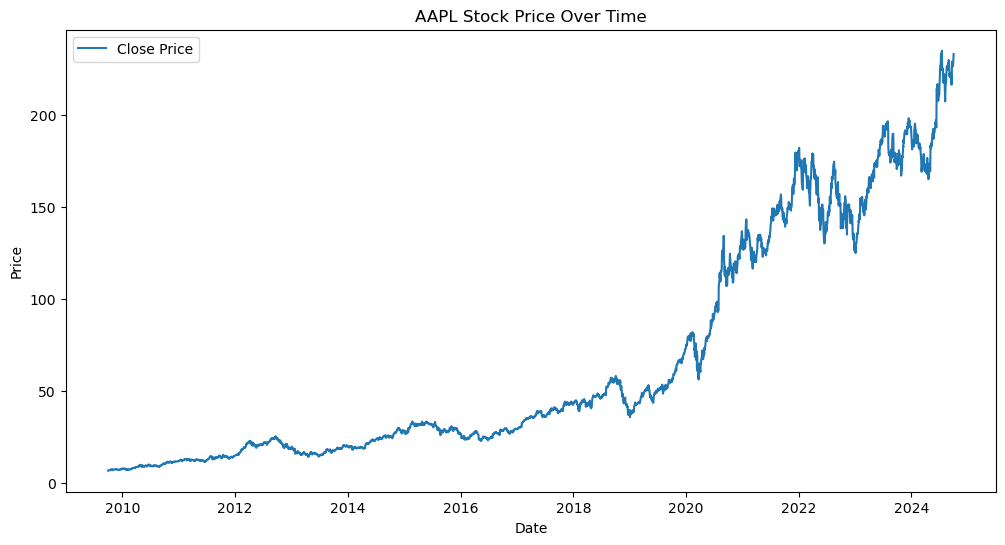

In [6]:


# Step 2: Fetch stock data
ticker_symbol = 'AAPL'  # Replace 'AAPL' with the desired ticker symbol
postgres = yf.download(ticker_symbol, start='2009-10-01', end='2024-10-01')

# Step 3: Perform EDA
# Display the first few rows of the stock data
print("Stock Data Head:")
print(postgres.head())

# Summary statistics
print("\nSummary Statistics:")
print(postgres.describe())

# Visualize the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(postgres['Close'], label='Close Price')
plt.title(f'{ticker_symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



# # Step 4: Save to PostgreSQL
# # Database connection parameters
# db_user = 'your_username'
# db_password = 'your_password'
# db_host = 'localhost'  # or your database host
# db_port = '5432'       # default port for PostgreSQL
# db_name = 'your_database_name'

# # Create a database engine
# engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# # Save the stock data to the database
# postgres.to_sql('postgres', engine, if_exists='replace', index=True)

# print("Stock data has been saved to the database.")


#ETL - Includes Data cleaning , Data transformation 

[*********************100%***********************]  1 of 1 completed

Stock Data Head:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-10-01  6.619643  6.650714  6.453571  6.459286   5.448712  524711600
2009-10-02  6.478929  6.640714  6.476786  6.603571   5.570424  553308000
2009-10-05  6.650000  6.673571  6.581071  6.643571   5.604166  423133200
2009-10-06  6.705000  6.786071  6.689286  6.786071   5.724369  605085600
2009-10-07  6.777143  6.805357  6.751071  6.794643   5.731602  465668000

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  3774.000000  3774.000000  3774.000000  3774.000000  3774.000000   
mean     65.837552    66.535969    65.171922    65.883332    63.701953   
std      61.966094    62.637551    61.345766    62.023503    62.305579   
min       6.478929     6.640714     6.453571     6.459286     5.448712   
25%      19.652857    19.823214    19.380981    19.607946    16.961021   
50%    

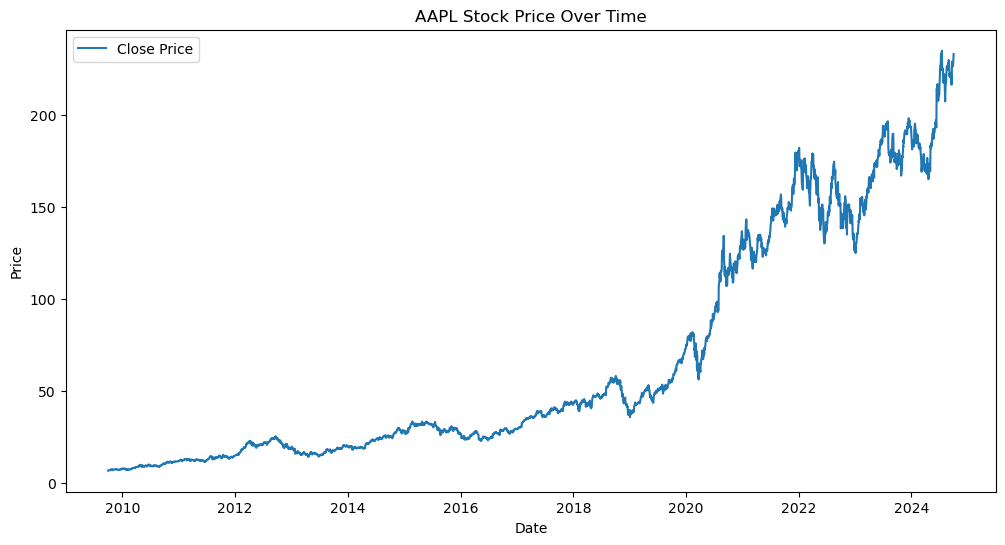

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_postgres(ticker_symbol, start_date, end_date):
    """
    Fetch stock data for a given ticker symbol and date range.
    """
    return yf.download(ticker_symbol, start=start_date, end=end_date)

def perform_eda(postgres):
    """
    Perform exploratory data analysis on the stock data.
    """
    # Display the first few rows of the stock data
    print("Stock Data Head:")
    print(postgres.head())

    # Summary statistics
    print("\nSummary Statistics:")
    print(postgres.describe())

def visualize_stock_price(postgres, ticker_symbol):
    """
    Visualize the stock price over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(postgres['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    ticker_symbol = 'AAPL'  # Replace 'AAPL' with the desired ticker symbol
    start_date = '2009-10-01'
    end_date = '2024-10-01'

    # Fetch stock data
    postgres = fetch_postgres(ticker_symbol, start_date, end_date)

    # Perform EDA
    perform_eda(postgres)

    # Visualize stock price
    visualize_stock_price(postgres, ticker_symbol)

In [8]:
# Define variables
STOCK_SYMBOL = 'AAPL'
PERIOD = '1mo'
INTERVAL = '1d'

In [9]:
import yfinance as yf
import psycopg2
from psycopg2 import sql

# Database connection parameters
db_params = {
    'dbname': 'postgres',
    'user': 'cosc',
    'password': 'cosc436',
    'host': 'postgres',
    'port': '5432'
}

# Function to fetch stock data
def fetch_postgres(stock_symbol):
    stock = yf.Ticker(stock_symbol)
    stock_info = stock.info
    return {
        'stock_symbol': stock_symbol,
        'company_name': stock_info.get('shortName', ''),
        'sector': stock_info.get('sector', ''),
        'currency': stock_info.get('currency', ''),
        'exchange': stock_info.get('exchange', '')
    }

# Function to fetch historical stock prices
def fetch_historical_data(stock_symbol, start_date='2009-01-01', end_date=None):
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(start=start_date, end=end_date)
    hist['RSI'] = calculate_rsi(hist['Close'])
    hist['SMA'] = hist['Close'].rolling(window=14).mean()
    hist['Bollinger_Upper'] = hist['SMA'] + (2 * hist['Close'].rolling(window=14).std())
    hist['Bollinger_Lower'] = hist['SMA'] - (2 * hist['Close'].rolling(window=14).std())
    return hist

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to insert data into the stock_dimension table
def insert_postgres(cur, postgres):
    insert_query = """
    INSERT INTO finance_schema.stock_dimension (stock_symbol, company_name, sector, currency, exchange) 
    VALUES (%s, %s, %s, %s, %s) 
    ON CONFLICT (stock_symbol) DO NOTHING;
    """
    cur.execute(insert_query, (
        postgres['stock_symbol'],
        postgres['company_name'],
        postgres['sector'],
        postgres['currency'],
        postgres['exchange']
    ))

# Function to insert date data into the date_dimension table
def insert_date_data(cur, historical_data):
    for date in historical_data.index:
        cur.execute("""
        INSERT INTO finance_schema.date_dimension (full_date, day_of_week, month, quarter, year, is_holiday) 
        VALUES (%s, %s, %s, %s, %s, %s) 
        ON CONFLICT (full_date) DO NOTHING;
        """, (
            date.date(),
            date.strftime('%A'),
            date.strftime('%B'),
            'Q' + str((date.month - 1) // 3 + 1),
            date.year,
            False  # Adjust this for holidays if needed
        ))

# Function to insert sector and exchange data
def insert_sector_and_exchange(cur, stock_data):
    sector_name = stock_data['sector']
    if sector_name:
        cur.execute("""
            INSERT INTO finance_schema.sector_dimension (sector_name) 
            VALUES (%s) 
            ON CONFLICT (sector_name) DO NOTHING;
        """, (sector_name,))

    exchange_name = stock_data['exchange']
    if exchange_name:
        cur.execute("""
            INSERT INTO finance_schema.exchange_dimension (exchange_name, country) 
            VALUES (%s, %s) 
            ON CONFLICT (exchange_name) DO NOTHING;
        """, (exchange_name, 'USA'))

# Function to insert historical stock data
def insert_historical_data(cur, stock_id, historical_data):
    insert_query = """
    INSERT INTO finance_schema.fact_stock_data
    (stock_id, date_id, open_price, close_price, high_price, low_price, volume, rsi, sma, bollinger_band)
    VALUES (
        %s, 
        (SELECT date_id FROM finance_schema.date_dimension WHERE full_date = %s LIMIT 1), 
        %s, %s, %s, %s, %s, %s, %s, %s
    )
    ON CONFLICT (stock_id, date_id) DO NOTHING;
    """

    for date, row in historical_data.iterrows():
        cur.execute(insert_query, (
            stock_id,
            date.date(),
            row['Open'],
            row['Close'],
            row['High'],
            row['Low'],
            row['Volume'],
            row['RSI'],
            row['SMA'],
            row['Bollinger_Upper']
        ))

def main(stock_symbol='AAPL', start_date='2009-01-01', end_date='2023-10-01'):
    # Establish database connection
    try:
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()

        # Fetch stock data
        postgres = fetch_postgres(stock_symbol)
        insert_sector_and_exchange(cur, postgres)
        insert_postgres(cur, postgres)

        # Retrieve stock_id for the inserted stock
        cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
        stock_id = cur.fetchone()[0]

        # Fetch historical stock price data
        historical_data = fetch_historical_data(stock_symbol, start_date, end_date)

        # Insert date data
        insert_date_data(cur, historical_data)

        # Insert historical data
        insert_historical_data(cur, stock_id, historical_data)

        # Commit and close
        conn.commit()
        cur.close()
        conn.close()

        print(f"Inserted historical data for {stock_symbol} into the database.")
    except Exception as e:
        print(f"Error: {e}")

# Run the main function
main(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01')


Inserted historical data for AAPL into the database.


In [10]:
import psycopg2
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def fetch_historical_data(stock_symbol, start_date='2009-01-01', end_date=None):
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(start=start_date, end=end_date)

    # Calculate RSI, SMA, and Bollinger Bands
    hist['RSI'] = calculate_rsi(hist['Close'])
    hist['SMA'] = hist['Close'].rolling(window=14).mean()
    hist['Bollinger_Upper'] = hist['SMA'] + (2 * hist['Close'].rolling(window=14).std())
    hist['Bollinger_Lower'] = hist['SMA'] - (2 * hist['Close'].rolling(window=14).std())
    
    # Create Lagged features
    hist['Lagged_RSI'] = hist['RSI'].shift(1)
    hist['Lagged_SMA'] = hist['SMA'].shift(1)

    # Add a Label column (0 if the price is down, 1 if it's up)
    hist['Label'] = (hist['Close'].shift(-1) > hist['Close']).astype(int)

    hist = hist.dropna()  # Drop rows with missing values (due to shifts)

    # Debugging step: Print out the first few rows to ensure lagged features are present
    print(hist.head())

    return hist


def prepare_data(historical_data):
    features = historical_data[['Lagged_RSI', 'Lagged_SMA']].values
    labels = historical_data['Label'].values
    return train_test_split(features, labels, test_size=0.2, random_state=42)


def train_and_predict(historical_data, future_dates):
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(historical_data)

    # Train Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    print("Model Evaluation:\n", classification_report(y_test, y_pred))

    # Predict for future dates
    future_data = pd.DataFrame({
        'Lagged_RSI': [historical_data['RSI'].iloc[-1]] * len(future_dates),  # Use latest RSI for all future dates
        'Lagged_SMA': [historical_data['SMA'].iloc[-1]] * len(future_dates),  # Use latest SMA for all future dates
    }, index=future_dates)
    
    future_data['Predicted_Trend'] = model.predict(future_data.values)
    future_data['Prediction_Confidence'] = model.predict_proba(future_data.values).max(axis=1)

    return future_data


def insert_future_predictions(cur, stock_id, future_predictions):
    insert_query = """
    INSERT INTO finance_schema.future_predictions
    (stock_id, date_id, predicted_trend, prediction_confidence)
    VALUES (%s, %s, %s, %s)
    ON CONFLICT (stock_id, date_id) DO NOTHING;
    """
    for date, row in future_predictions.iterrows():
        # Ensure the date_id corresponds to the full_date in the date_dimension table
        cur.execute("""
        SELECT date_id FROM finance_schema.date_dimension WHERE full_date = %s;
        """, (date,))
        date_id_result = cur.fetchone()
        if date_id_result:
            date_id = date_id_result[0]
            cur.execute(insert_query, (
                stock_id,
                date_id,
                'up' if row['Predicted_Trend'] == 1 else 'down',
                row['Prediction_Confidence']
            ))


db_params = {
    'dbname': 'postgres',
    'user': 'cosc',
    'password': 'cosc436',
    'host': 'postgres',
    'port': '5432'
}

def main(stock_symbol='AAPL', end_date='2023-10-01', future_days=30):
    # Establish database connection
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    # Retrieve stock_id
    cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
    stock_id_result = cur.fetchone()
    if not stock_id_result:
        print(f"Stock symbol {stock_symbol} not found in the database. Exiting.")
        return
    stock_id = stock_id_result[0]

    # Fetch historical data from the database
    historical_data_query = """
    SELECT dd.full_date, fsd.close_price, fsd.sma, fsd.rsi, fsd.volume
    FROM finance_schema.fact_stock_data fsd
    JOIN finance_schema.date_dimension dd ON fsd.date_id = dd.date_id
    WHERE fsd.stock_id = %s
    ORDER BY dd.full_date ASC;
    """
    cur.execute(historical_data_query, (stock_id,))
    historical_data = pd.DataFrame(cur.fetchall(), columns=['Date', 'Close', 'SMA', 'RSI', 'Volume'])
    historical_data.set_index('Date', inplace=True)

    # Predict future trends
    future_dates = pd.date_range(end=pd.to_datetime(end_date), periods=future_days + 1, freq='B')[1:]  # Skip end_date
    future_predictions = train_and_predict(historical_data, future_dates)

    # Insert future predictions into the database
    insert_future_predictions(cur, stock_id, future_predictions)

    # Commit and close
    conn.commit()
    cur.close()
    conn.close()

    print(f"Inserted future trend data for {stock_symbol}.")

# Call the main function to run
main(stock_symbol='AAPL', end_date='2024-10-01', future_days=30)


KeyError: "None of [Index(['Lagged_RSI', 'Lagged_SMA'], dtype='object')] are in the [columns]"

In [11]:
# Function to create or update the Moving Average Crossover table
def create_or_update_crossover_table(cur):
    # Create the table if it doesn't exist
    create_table_query = """
    CREATE TABLE IF NOT EXISTS finance_schema.moving_average_crossover (
        crossover_id SERIAL PRIMARY KEY,
        stock_id INT REFERENCES finance_schema.stock_dimension(stock_id),
        
        date_id INT REFERENCES finance_schema.date_dimension(date_id),
        short_ma DECIMAL(10, 2) NOT NULL,
        long_ma DECIMAL(10, 2) NOT NULL,
        price DECIMAL(10, 2) NOT NULL,
        crossover_signal VARCHAR(4) NOT NULL,
        UNIQUE (stock_id, date_id)
    );
    """
    cur.execute(create_table_query)

    # Add the `price` column if it doesn't already exist
    alter_table_query = """
    DO $$
    BEGIN
        IF NOT EXISTS (
            SELECT 1
            FROM information_schema.columns
            WHERE table_schema = 'finance_schema'
              AND table_name = 'moving_average_crossover'
              AND column_name = 'price'
        ) THEN
            ALTER TABLE finance_schema.moving_average_crossover 
            ADD COLUMN price DECIMAL(10, 2) NOT NULL;
        END IF;
    END $$;
    """
    cur.execute(alter_table_query)

    print("Table `moving_average_crossover` is ready.")

# Function to calculate moving average crossover signals with price
def calculate_ma_crossover_with_price(historical_data, short_window=50, long_window=200):
    historical_data['Short_MA'] = historical_data['Close'].rolling(window=short_window).mean()
    historical_data['Long_MA'] = historical_data['Close'].rolling(window=long_window).mean()
    historical_data['Crossover_Signal'] = (
        (historical_data['Short_MA'] > historical_data['Long_MA']).astype(int).diff()
    )
    historical_data['Crossover_Signal'] = historical_data['Crossover_Signal'].map({1: "BUY", -1: "SELL"})
    # Include price and filter rows with valid signals
    crossover_data = historical_data[['Close', 'Short_MA', 'Long_MA', 'Crossover_Signal']].dropna()
    return crossover_data[crossover_data['Crossover_Signal'].notnull()]


# Function to insert crossover data into the table with price
def insert_crossover_data_with_price(cur, stock_id, crossover_data):
    insert_query = """
    INSERT INTO finance_schema.moving_average_crossover
    (stock_id, date_id, short_ma, long_ma, price, crossover_signal)
    VALUES (
        %s,
        (SELECT date_id FROM finance_schema.date_dimension WHERE full_date = %s),
        %s, %s, %s, %s
    )
    ON CONFLICT DO NOTHING;
    """
    
    for date, row in crossover_data.iterrows():
        # Fetch the corresponding date_id from the date_dimension table
        # Pass the actual date object to match the full_date column in the date_dimension table.
        # Here, we're passing the actual date object (not formatted as string).
        cur.execute(insert_query, (
            stock_id,
            date.date(),  # Use the date object directly, not formatted string
            row['Short_MA'],
            row['Long_MA'],
            row['Close'],  # Price
            row['Crossover_Signal']
        ))





# Main function to process moving average crossovers with price
def process_crossover_with_price(stock_symbol, start_date='2009-01-01', end_date=None):
    # Establish database connection
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    # Step 1: Create or update the table
    # create_or_update_crossover_table(cur)

    # Step 2: Fetch stock_id
    cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
    stock_id = cur.fetchone()
    if not stock_id:
        print(f"Stock symbol {stock_symbol} not found in stock_dimension table.")
        conn.close()
        return
    stock_id = stock_id[0]

    # Step 3: Fetch historical data
    historical_data = fetch_historical_data(stock_symbol, start_date, end_date)

    # Step 4: Calculate crossover signals with price
    crossover_data = calculate_ma_crossover_with_price(historical_data)

    # Step 5: Insert crossover data into the table
    insert_crossover_data_with_price(cur, stock_id, crossover_data)

    # Commit and close
    conn.commit()
    cur.close()
    conn.close()

    print(f"Moving average crossover data with price processed and inserted for stock {stock_symbol}.")

# Run the process for a specific stock
process_crossover_with_price(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01')


                               Open      High       Low     Close     Volume  \
Date                                                                           
2009-01-23 00:00:00-05:00  2.615598  2.707485  2.605958  2.661993  763770000   
2009-01-26 00:00:00-05:00  2.677057  2.740625  2.660186  2.700557  692238400   
2009-01-27 00:00:00-05:00  2.717125  2.758098  2.703568  2.733393  618038400   
2009-01-28 00:00:00-05:00  2.775270  2.862035  2.756591  2.837934  861406000   
2009-01-29 00:00:00-05:00  2.804493  2.842151  2.789731  2.801782  592729200   

                           Dividends  Stock Splits        RSI       SMA  \
Date                                                                      
2009-01-23 00:00:00-05:00        0.0           0.0  46.459229  2.640496   
2009-01-26 00:00:00-05:00        0.0           0.0  42.083404  2.629866   
2009-01-27 00:00:00-05:00        0.0           0.0  46.273968  2.624938   
2009-01-28 00:00:00-05:00        0.0           0.0  54.954978  2

In [12]:
## simulating results
def insert_portfolio_history(cur, stock_id , trade_date, action, shares, capital, position, portfolio_value, stock_price):
    try:
        print(trade_date, action, shares, capital, position, portfolio_value, stock_price)
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()
        insert_query = """
        INSERT INTO finance_schema.portfolio_history
        (stock_id, trade_date, action, shares, capital, position, portfolio_value, stock_price)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s);
        """
        cur.execute(insert_query, (1, trade_date, action, shares, capital, position, portfolio_value, stock_price))
        print(f"Inserted portfolio history: {trade_date} {action} {shares} shares")
    except Exception as e:
        print(f"Error inserting portfolio history: {e}")

def simulate_portfolio(crossover_data, initial_capital=10000, cur=None, stock_id=None):
    capital = initial_capital
    position = 0  # Number of shares held
    trade_log = []  # To store trade details for later use
    buy_price = 0  # Track the buy price for profitability calculation

    for date, row in crossover_data.iterrows():
        price = row['Close']
        signal = row['Crossover_Signal']

        if signal == "BUY" and capital >= price:  # Ensure we can afford at least one share
            num_shares = capital // price  # Buy as many shares as possible
            capital -= num_shares * price
            position += num_shares
            buy_price = price  # Update the buy price
            trade_log.append({"date": date, "type": "BUY", "price": price, "shares": num_shares})

            # Insert portfolio history data after BUY
            portfolio_value = capital + position * price
            insert_portfolio_history(cur, stock_id, date.date(), "BUY", num_shares, capital, position, portfolio_value, price)

        elif signal == "SELL" and position > 0:  # Sell all shares
            capital += position * price
            trade_log.append({"date": date, "type": "SELL", "price": price, "shares": position})
            position = 0

            # Insert portfolio history data after SELL
            portfolio_value = capital + position * price
            insert_portfolio_history(cur, stock_id, date.date(), "SELL", position, capital, position, portfolio_value, price)

    # Final capital includes the value of remaining shares
    final_capital = capital + position * (crossover_data.iloc[-1]['Close'] if position > 0 else 0)

    # Calculate performance stats
    total_trades = len(trade_log)
    profitable_trades = 0

    # Calculate profitable trades (based on matching BUY and SELL prices)
    for i in range(1, len(trade_log)):
        if trade_log[i]["type"] == "SELL" and trade_log[i - 1]["type"] == "BUY":
            if trade_log[i]["price"] > trade_log[i - 1]["price"]:  # Check if selling price > buying price
                profitable_trades += 1

    win_ratio = (profitable_trades / (total_trades // 2)) * 100 if total_trades > 0 else 0
    cumulative_return = ((final_capital - initial_capital) / initial_capital) * 100

    return final_capital, total_trades, profitable_trades, win_ratio, cumulative_return, trade_log



def insert_backtesting_results(cur, stock_id, start_date, end_date, initial_capital, final_capital, 
                               total_trades, profitable_trades, win_ratio, cumulative_return):
    insert_query = """
    INSERT INTO finance_schema.backtesting_results
    (stock_id, start_date, end_date, initial_capital, final_capital, total_trades, 
     profitable_trades, win_ratio, cumulative_return)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
    ON CONFLICT (stock_id, start_date, end_date) DO UPDATE
    SET final_capital = EXCLUDED.final_capital,
        total_trades = EXCLUDED.total_trades,
        profitable_trades = EXCLUDED.profitable_trades,
        win_ratio = EXCLUDED.win_ratio,
        cumulative_return = EXCLUDED.cumulative_return;
    """
    cur.execute(insert_query, (stock_id, start_date, end_date, initial_capital, final_capital, 
                               total_trades, profitable_trades, win_ratio, cumulative_return))




def process_crossover_with_price(stock_symbol, start_date='2009-01-01', end_date='2024-10-01', initial_capital=10000):
    # try:
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()

           # Check if cursor is initialized correctly
        if cur is None:
            print("Cursor not initialized properly.")
            return  # Exit the function if the cursor is None

    

        cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
        stock_id = cur.fetchone()
        if not stock_id:
            raise ValueError(f"Stock symbol {stock_symbol} not found in stock_dimension table.")
        stock_id = stock_id[0]
    
        # Fetch historical data and process crossovers
         # Step 3: Fetch historical data
        historical_data = fetch_historical_data(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01')


        crossover_data = calculate_ma_crossover_with_price(historical_data)
        # insert_crossover_data_with_price(cur, stock_id, crossover_data)ing step to check the columns of the dataframe
        for date, row in crossover_data.iterrows():
            print("Row:", row)
            price = row['Close']  # Update this line based on actual column name
            signal = row['Crossover_Signal']

        # print("Crossover Data Preview:")
        # print(crossover_data.head())

        # Run simulation and save results
        final_capital, total_trades, profitable_trades, win_ratio, cumulative_return, trade_log = \
            simulate_portfolio(crossover_data, initial_capital)
    
        insert_backtesting_results(cur, stock_id  , start_date, end_date, initial_capital, final_capital, 
                                   total_trades, profitable_trades, win_ratio, cumulative_return);
    
        conn.commit()
    
        print(f"Backtesting completed for stock {stock_symbol}. Results inserted into the database.")
    
    # except Exception as e:
    #     print(f"Error during backtesting: {e}")
    #     conn.rollback()



process_crossover_with_price(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01', initial_capital=10000)



                               Open      High       Low     Close     Volume  \
Date                                                                           
2009-01-23 00:00:00-05:00  2.615598  2.707485  2.605958  2.661993  763770000   
2009-01-26 00:00:00-05:00  2.677057  2.740625  2.660186  2.700557  692238400   
2009-01-27 00:00:00-05:00  2.717125  2.758098  2.703568  2.733393  618038400   
2009-01-28 00:00:00-05:00  2.775270  2.862035  2.756591  2.837934  861406000   
2009-01-29 00:00:00-05:00  2.804493  2.842151  2.789731  2.801782  592729200   

                           Dividends  Stock Splits        RSI       SMA  \
Date                                                                      
2009-01-23 00:00:00-05:00        0.0           0.0  46.459229  2.640496   
2009-01-26 00:00:00-05:00        0.0           0.0  42.083404  2.629866   
2009-01-27 00:00:00-05:00        0.0           0.0  46.273968  2.624938   
2009-01-28 00:00:00-05:00        0.0           0.0  54.954978  2